In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


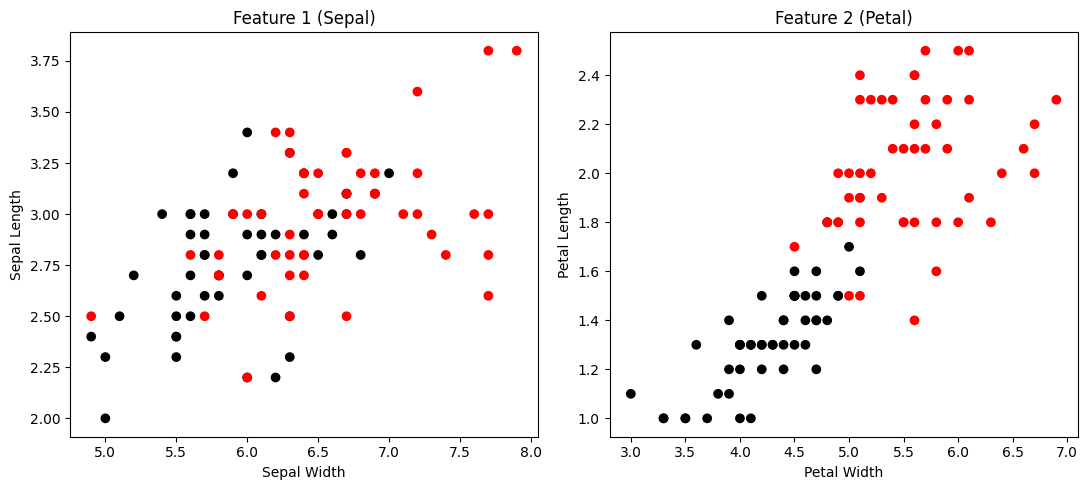

In [ ]:
# Load and split the data
# sepal width, sepal length, petal width, petal length
X = np.loadtxt("/Users/jackarnott/git/Scientific-Computing-Case-Study/Flower Classifier/Data/iris_data.csv", delimiter=',')
y = np.loadtxt("/Users/jackarnott/git/Scientific-Computing-Case-Study/Flower Classifier/Data/iris_types.csv",dtype=int, delimiter=',')
y[y == 2] = 0
y = np.reshape(y,(100,1))
full_data = np.concatenate((X,y),axis = 1)
col = np.where(full_data[:,4]==1,'k','r')
fig, ax = plt.subplots(1,2,figsize = (11,5))
ax[0].scatter(full_data[:,0],full_data[:,1],c = col)
ax[0].set_xlabel("Sepal Width")
ax[0].set_ylabel("Sepal Length")
ax[0].set_title("Feature 1 (Sepal)")
ax[1].scatter(full_data[:,2],full_data[:,3],c = col)
ax[1].set_title("Feature 2 (Petal)")
ax[1].set_xlabel("Petal Width")
ax[1].set_ylabel("Petal Length")
plt.tight_layout()
plt.show()

In [57]:
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:

lbl_clf = LabelEncoder()
Y_encoded = lbl_clf.fit_transform(y)
Y_final = tf.keras.utils.to_categorical(Y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
std_clf = StandardScaler()
x_train_new = std_clf.fit_transform(X_train)
x_test_new = std_clf.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=4,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,  activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))  # 1 neuron with sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
# Train the model and report accuracy
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=300)
accuracy = model.evaluate(X_test, y_test)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0763 - val_accuracy: 0.8500 - val_loss: 0.3163
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0735 - val_accuracy: 0.8500 - val_loss: 0.3143
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0664 - val_accuracy: 0.8500 - val_loss: 0.3086
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0798 - val_accuracy: 0.8500 - val_loss: 0.3052
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0772 - val_accuracy: 0.8500 - val_loss: 0.3089
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0716 - val_accuracy: 0.8500 - val_loss: 0.3129
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0752 - val_accuracy: 0.8500 - val_loss: 0.3167
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0619 - val_accuracy: 0.8500 - val_loss:

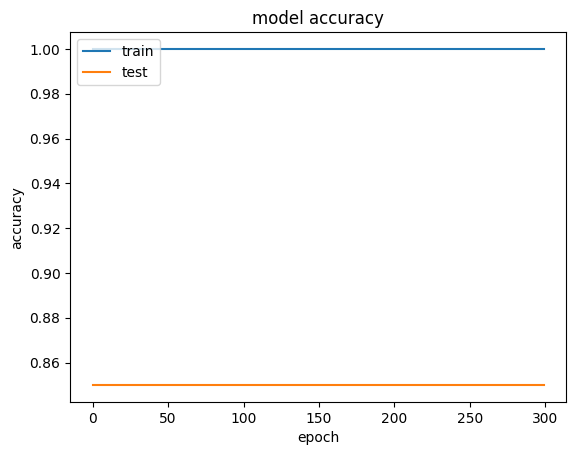

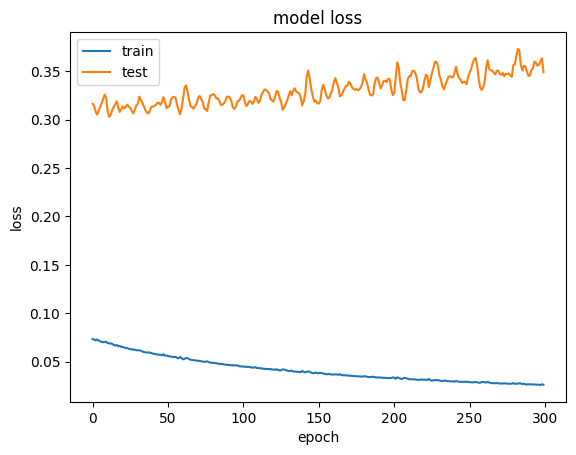

In [79]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Improvements
- Boosting
